# Praktikum 4
#### Muhamad Rizal Arfiyan - 22.11.5227 - IF11
#### [https://github.com/rizalarfiyan/big-data](https://github.com/rizalarfiyan/big-data)

## Simple Linear Regression

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

%matplotlib inline

Load data yang sudah disediakan oleh sklearn datasets

In [19]:
# load dataset diabetes
data_diabetes = load_diabetes(as_frame=True)

# membuat dataframe
df = pd.DataFrame(data_diabetes["frame"])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Melihat deskripsi dari datasets

In [17]:
print(data_diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Analisis dan visualisasi data
Membuat scatter plot antara kolom bmi dan target.

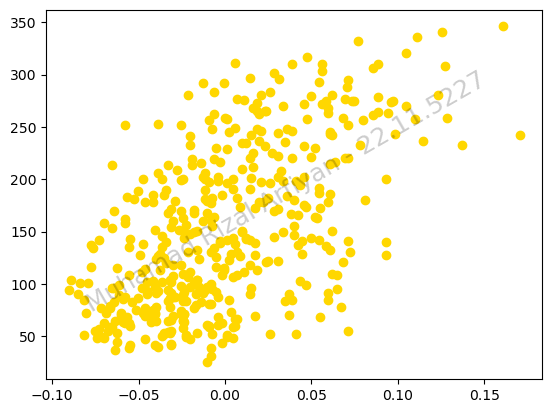

In [41]:
# Scatter plot kolom 'bmi' dan 'target'
plt.text(
    0.5,
    0.5,
    "Muhamad Rizal Arfiyan - 22.11.5227",
    fontsize=18,
    color="black",
    ha="center",
    va="center",
    alpha=0.2,
    transform=plt.gcf().transFigure,
    rotation=30,
)
plt.scatter(df["bmi"], df["target"], color="gold")
plt.show()

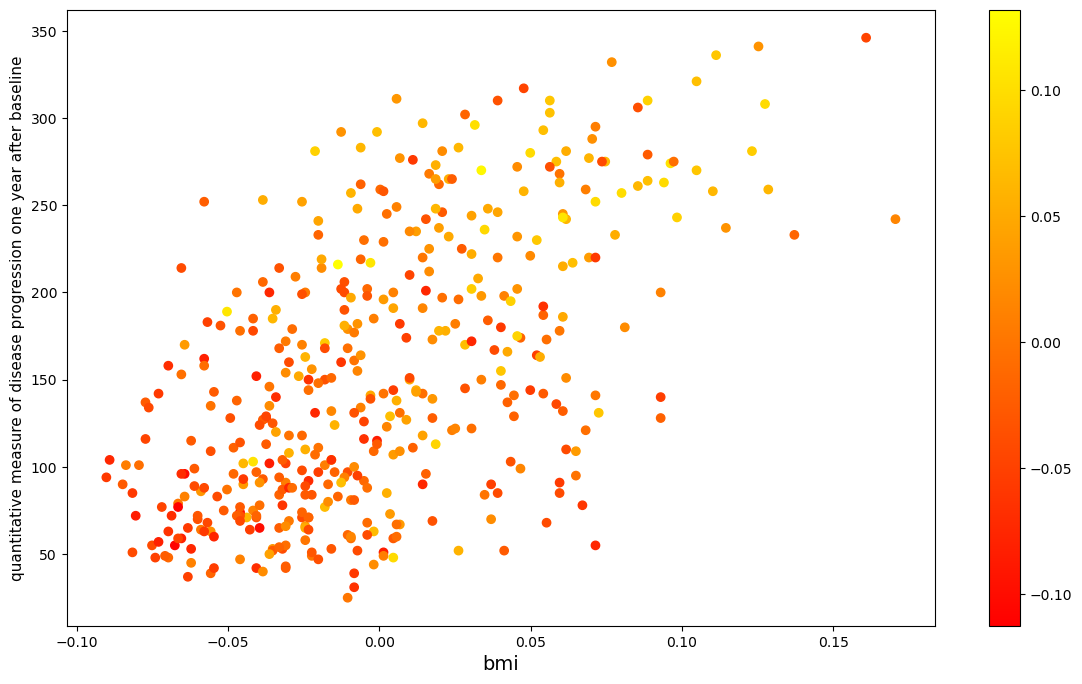

In [42]:
# Mengatur warna scatter plot dengan color map
fig, ax = plt.subplots(figsize=(14, 8))
x = ax.scatter(df["bmi"], df["target"], c=df["bp"], cmap="autumn")

ax.set_xlabel("bmi", size=14)
ax.set_ylabel(
    "quantitative measure of disease progression one year after baseline", size=11
)

# Menambakan color bar
fig.colorbar(x)

plt.show()

<Axes: >

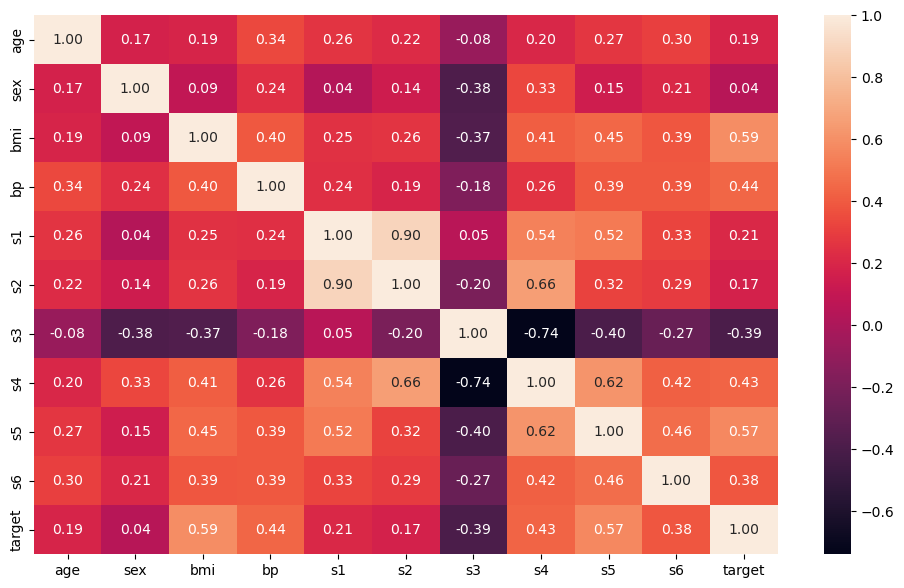

In [22]:
# Menampilkan korelasi antarkolom

plt.figure(figsize=(12, 7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

## Data Preparation
### Membagi data train dan test

In [34]:
# Membagi data train dan test

np.random.seed(42)
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]

In [38]:
# Mendefinisikan X_train, y_train, X_test, dan y_test

X_train = np.asanyarray(train[["bmi"]])
y_train = np.asanyarray(train[["target"]])

X_test = np.asanyarray(test[["bmi"]])
y_test = np.asanyarray(test[["target"]])

## Modeling
### Linear regression dengan satu variabel bebas

In [25]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Coefficient dan Intercept
print("Coefficients: ", lr_model.coef_)
print("Intercept: ", lr_model.intercept_)

Coefficients:  [[958.28967126]]
Intercept:  [152.46395235]


Text(0, 0.5, 'target')

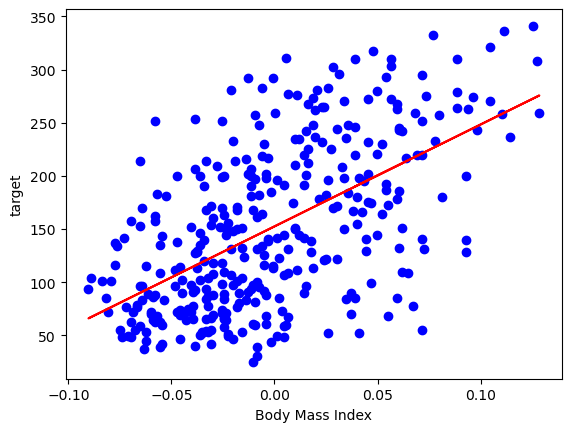

In [27]:
# Visualisasi dengan scatter plot

plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, lr_model.coef_[0][0] * X_train + lr_model.intercept_[0], "-r")
plt.xlabel("Body Mass Index")
plt.ylabel("target")

In [28]:
# Menguji model dengan X_test

y_pred = lr_model.predict(X_test)

print("Data asli: \n", y_test[0:10])
print("\n")
print("Hasil prediksi: \n", y_pred[0:10])

Data asli: 
 [[ 75.]
 [ 63.]
 [ 69.]
 [179.]
 [ 87.]
 [ 65.]
 [102.]
 [ 92.]
 [155.]
 [ 59.]]


Hasil prediksi: 
 [[103.13689113]
 [150.64827531]
 [169.23968652]
 [124.82687086]
 [104.1697473 ]
 [ 91.77547317]
 [122.76115851]
 [129.99115175]
 [145.48399442]
 [143.41828207]]


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menampilkan MAE dan MSE
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_pred, y_test))
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y_pred, y_test))

Mean Absolute Error (MAE): 51.84
Mean Squared Error (MSE): 3694.70
